In [ ]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import norm,binom,t,poisson,expon
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway,shapiro,levene,kruskal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Yulu.csv"
data=pd.read_csv(path)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-11 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-11 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-11 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-11 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-11 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


##General Analysis(Non Graphical and Univariate)##


***Shape of data***

In [ ]:
data.shape

(10886, 12)

***If there is any null value***

In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

***Distinct Season with their count 1:Spring, 2:Summer,3:Fall,4:winter***

In [ ]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

**Distinct Weather with their count**

**Assumption**

**1: Clear, Few clouds, partly cloudy, partly cloudy**

**2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**

**3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**

**4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**

In [ ]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

***Count of holiday 0:Non Holiday, 1:Holiday***

In [ ]:
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

**Count of working and Non working day; 1:Neither weekend nor holiday,0:Otherwise**

In [ ]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

***Maximum and minimum temperature present in the Data***

In [ ]:
max=data['temp'].max()
min=data['temp'].min()
print(f'The maximum and minimum temperature is {max} and  {min} degree celsius respectively')

The maximum and minimum temperature is 41.0 and  0.82 degree celsius respectively


***Maximum and minimum temperature felt present in the Data***

In [ ]:
max1=data['atemp'].max()
min1=data['atemp'].min()
print(f'The maximum and minimum felt temperature is {max1} and {min1} degree celsius respectively')

The maximum and minimum felt temperature is 45.455 and 0.76 degree celsius respectively


***Maximum and minimum Humidity present in the Data***

In [ ]:
max2=data['humidity'].max()
min2=data['humidity'].min()
print(f'The maximum and minimum humidity is {max2} and {min2}')

The maximum and minimum humidity is 100 and 0


**Color coding (Deep Sky blue)**
**Color is inspired from company's logo Color**

In [ ]:
sky_blue=(0/255,191/255,255/255)

***Checking if the temperature,temperature felt,Humidity is constant throughout the day***

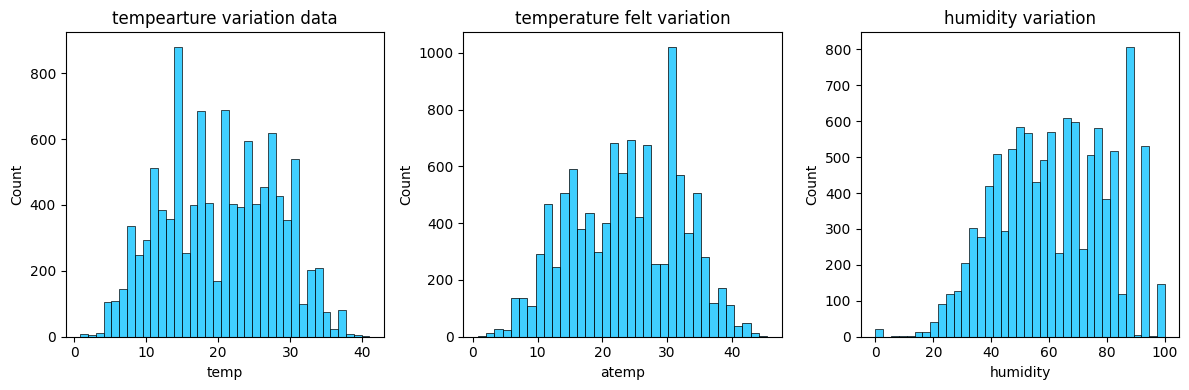

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.histplot(data=data,x='temp',ax=axes[0],color=sky_blue)
axes[0].set_title('tempearture variation data')
sns.histplot(data=data,x='atemp',ax=axes[1],color=sky_blue)
axes[1].set_title('temperature felt variation')
sns.histplot(data=data,x='humidity',ax=axes[2],color=sky_blue)
axes[2].set_title('humidity variation')
plt.tight_layout()
plt.show()

***Maximum and minimum windspeed***

In [ ]:
max3=data['windspeed'].max()
min3=data['windspeed'].min()
print(f"The maximum and minimum windspeed is {max3} and {min3} respectively.")

The maximum and minimum windspeed is 56.9969 and 0.0 respectively.


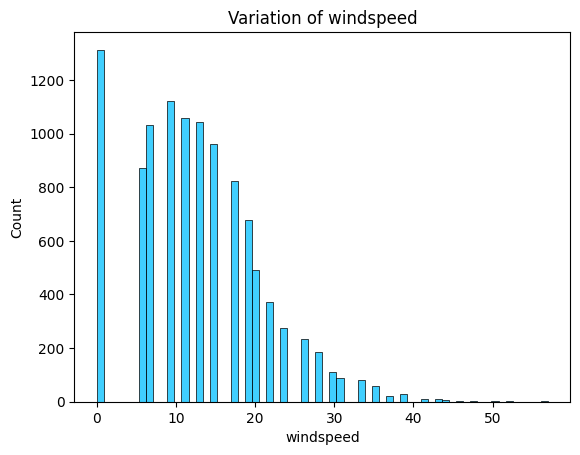

In [ ]:
figsize=(6,4)
sns.histplot(data=data,x='windspeed',color=sky_blue)
plt.title("Variation of windspeed")
plt.show()

In [ ]:
data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-11 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-11 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-11 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-11 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-11 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##Is there any growth in the usage(Bivariate and Graphical)##

In [ ]:
data1=data.copy()

***Checking how the different segment has increased with years.***

In [ ]:
data1['date'] = data1['datetime'].str.split(' ').str[0]
data1['time'] = data1['datetime'].str.split(' ').str[1]
data1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,01-01-11 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,01-01-11,0:00
1,01-01-11 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01-01-11,1:00
2,01-01-11 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,01-01-11,2:00
3,01-01-11 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,01-01-11,3:00
4,01-01-11 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,01-01-11,4:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19-12-12 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19-12-12,19:00
10882,19-12-12 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19-12-12,20:00
10883,19-12-12 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19-12-12,21:00
10884,19-12-12 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19-12-12,22:00


In [ ]:
data1['date'] = pd.to_datetime(data1['date'])

In [ ]:
data1['Date']=data1['date'].dt.day
data1['Month']=data1['date'].dt.month
data1['Year']=data1['date'].dt.year
data1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,Date,Month,Year
0,01-01-11 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0:00,1,1,2011
1,01-01-11 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1:00,1,1,2011
2,01-01-11 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2:00,1,1,2011
3,01-01-11 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3:00,1,1,2011
4,01-01-11 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4:00,1,1,2011


***Tracking how casual,registered and overall consumers are increasing with years***

In [ ]:
f=data1.groupby(['Year'])['casual'].sum()
f=pd.DataFrame(f).reset_index()
f

,Year,casual
0,2011,155817
1,2012,236318


In [ ]:
g=data1.groupby(['Year'])['registered'].sum()
g=pd.DataFrame(g).reset_index()
g

,Year,registered
0,2011,626162
1,2012,1067179


In [ ]:
h=data1.groupby(['Year'])['count'].sum()
h=pd.DataFrame(h).reset_index()
h

,Year,count
0,2011,781979
1,2012,1303497


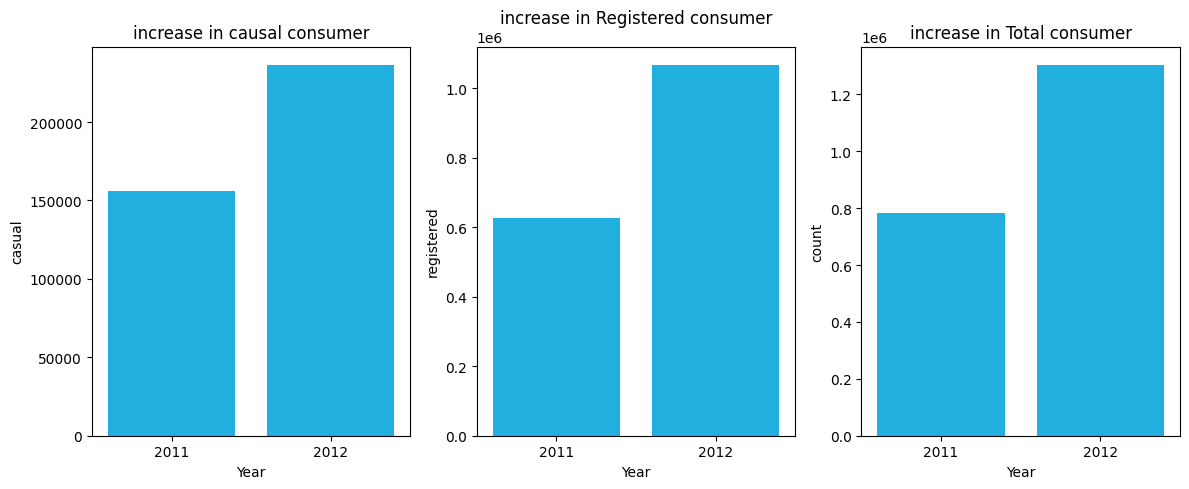

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(12,5))
sns.barplot(data=f,x=f['Year'],y=f['casual'],ax=axes[0],color=sky_blue)
axes[0].set_title('increase in causal consumer')
sns.barplot(data=g,x=g['Year'],y=g['registered'],ax=axes[1],color=sky_blue)
axes[1].set_title('increase in Registered consumer')
sns.barplot(data=h,x=h['Year'],y=h['count'],ax=axes[2],color=sky_blue)
axes[2].set_title('increase in Total consumer')
plt.tight_layout()
plt.show()

**Tracking Month to get any specific pattern**

In [ ]:
data10=data1.groupby(['Month'])['casual'].sum()
data10=pd.DataFrame(data10).reset_index()

In [ ]:
data11=data1.groupby(['Month'])['registered'].sum()
data11=pd.DataFrame(data11).reset_index()

In [ ]:
data12=data1.groupby(['Month'])['count'].sum()
data12=pd.DataFrame(data12).reset_index()

In [ ]:
data13=np.hstack([data10,data11,data12])
data13=pd.DataFrame(data13)
data13.drop([2,4],axis=1,inplace=True)
data13.rename({0:'Month',1:'casual',3:'registered',5:'count'},axis=1,inplace=True)
data13

,Month,casual,registered,count
0,1,20321,111902,132223
1,2,24903,120626,145529
2,3,36451,135531,171982
3,4,38457,138588,177045
4,5,36213,146297,182510
5,6,37859,153359,191218
6,7,37679,149414,187093
7,8,36020,144616,180636
8,9,36079,153646,189725
9,10,36011,151742,187753


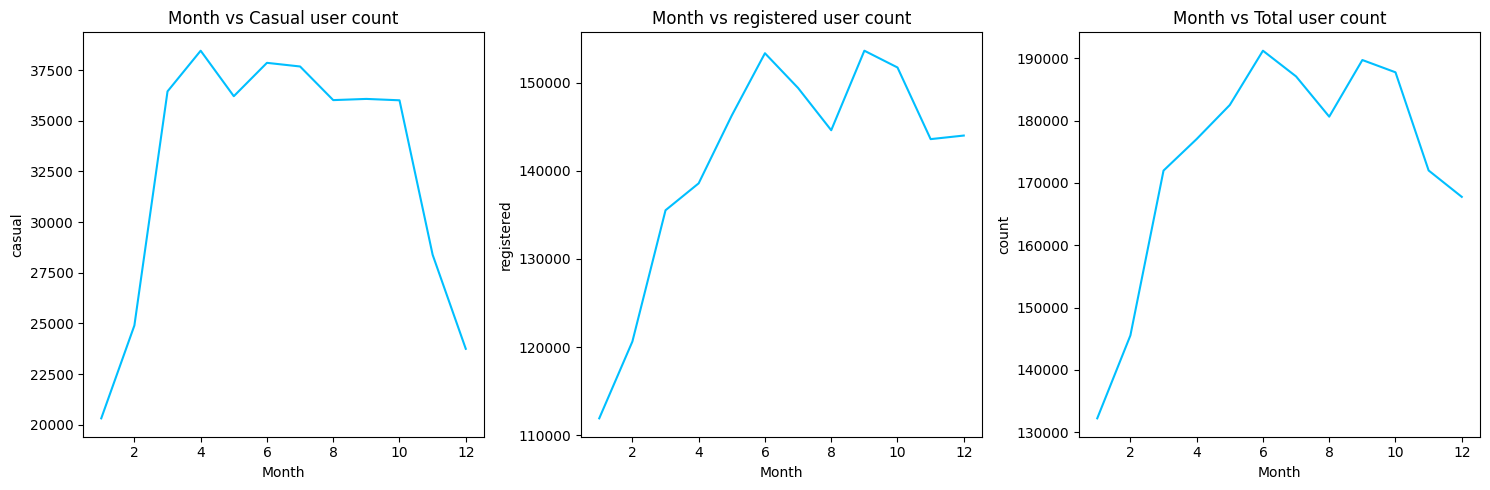

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.lineplot(x='Month',y='casual',data=data10,color=sky_blue,ax=axes[0])
axes[0].set_title('Month vs Casual user count')
sns.lineplot(x='Month',y='registered',data=data11,color=sky_blue,ax=axes[1])
axes[1].set_title('Month vs registered user count')
sns.lineplot(x='Month',y='count',data=data12,color=sky_blue,ax=axes[2])
axes[2].set_title('Month vs Total user count')
plt.tight_layout()
plt.show()

**tracking season to get any specific pattern**

In [ ]:
data20=data1.groupby('season')['casual'].sum()
data20=pd.DataFrame(data20).reset_index()
data20

,season,casual
0,1,41605
1,2,129672
2,3,142718
3,4,78140


In [ ]:
data21=data1.groupby('season')['registered'].sum()
data21=pd.DataFrame(data21).reset_index()
data21

,season,registered
0,1,270893
1,2,458610
2,3,497944
3,4,465894


In [ ]:
data22=data1.groupby('season')['count'].sum()
data22=pd.DataFrame(data22).reset_index()
data22

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [ ]:
data23=np.hstack([data20,data21,data22])
data23=pd.DataFrame(data23)
data23=data23.drop([2,4],axis=1)
data23=data23.rename({0:'Season',1:'Casual',3:'Registered',5:'Total count'},axis=1)
data23

,Season,Casual,Registered,Total count
0,1,41605,270893,312498
1,2,129672,458610,588282
2,3,142718,497944,640662
3,4,78140,465894,544034


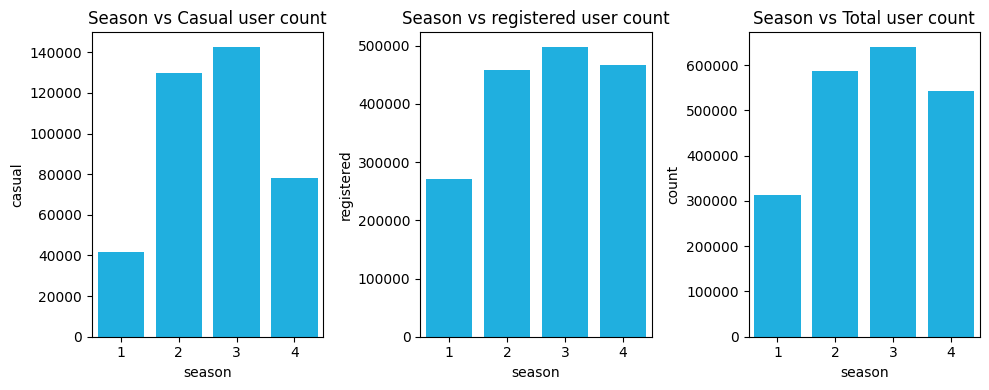

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
sns.barplot(x='season',y='casual',data=data20,color=sky_blue,ax=axes[0])
axes[0].set_title('Season vs Casual user count')
sns.barplot(x='season',y='registered',data=data21,color=sky_blue,ax=axes[1])
axes[1].set_title('Season vs registered user count')
sns.barplot(x='season',y='count',data=data22,color=sky_blue,ax=axes[2])
axes[2].set_title('Season vs Total user count')
plt.tight_layout()
plt.show()

***Tracking weather to get any specific pattern***

In [ ]:
datax=data1.groupby('weather')['casual'].sum()
datax=pd.DataFrame(datax).reset_index()
datay=data1.groupby('weather')['registered'].sum()
datay=pd.DataFrame(datay).reset_index()
dataz=data1.groupby('weather')['count'].sum()
dataz=pd.DataFrame(dataz).reset_index()

In [ ]:
datax0=np.hstack([datax,datay,dataz])
datax0=pd.DataFrame(datax0)
datax0=datax0.drop([2,4],axis=1)
datax0=datax0.rename({0:'Weather',1:'casual',3:'registered',5:'count'},axis=1)
datax0

,Weather,casual,registered,count
0,1,289900,1186163,1476063
1,2,87246,419914,507160
2,3,14983,87106,102089
3,4,6,158,164


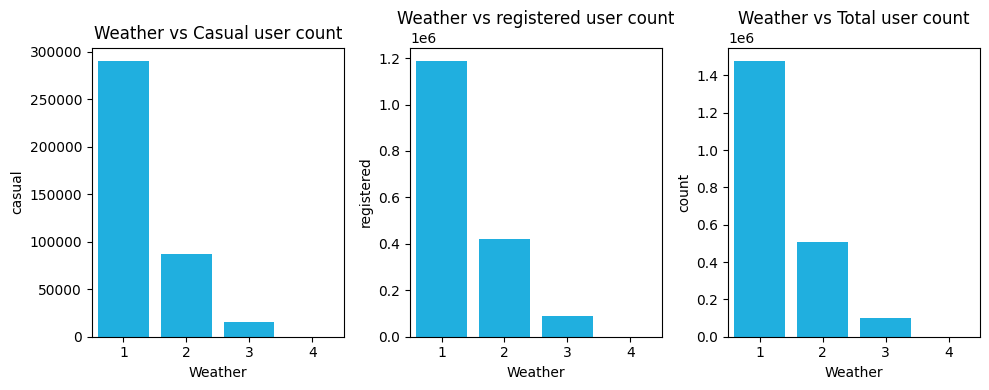

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,4))
sns.barplot(x='Weather',y='casual',data=datax0,color=sky_blue,ax=axes[0])
axes[0].set_title('Weather vs Casual user count')
sns.barplot(x='Weather',y='registered',data=datax0,color=sky_blue,ax=axes[1])
axes[1].set_title('Weather vs registered user count')
sns.barplot(x='Weather',y='count',data=datax0,color=sky_blue,ax=axes[2])
axes[2].set_title('Weather vs Total user count')
plt.tight_layout()
plt.show()

## Hypothesis Testing##

In [ ]:
data3=data1.copy()
data3.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,Date,Month,Year
0,01-01-11 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0:00,1,1,2011
1,01-01-11 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1:00,1,1,2011
2,01-01-11 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2:00,1,1,2011
3,01-01-11 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3:00,1,1,2011
4,01-01-11 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4:00,1,1,2011


**Checking if Working Day has an effect on the number of electric cycles rented**

2 Sample t test

Step1:

H0: The electric cycles rented on working day is more than that on non working day.

Ha: The electric cycles rented on non working day is more than that of working day.

Significance level=0.05

In [ ]:
alpha=0.05
working_day=data3[data3['workingday']==1]['casual'].sample(1000)
non_working_day=data3[data3['workingday']==0]['casual'].sample(1000)
t_stat,p_value=ttest_ind(working_day,non_working_day,equal_var=False,alternative="less")
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented on non working day is more than that of working day.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented on working day is more than that of working day.")

The p value is 1.706716630259851e-37
The null hypothesis is rejected
The electric cycles rented on non working day is more than that of working day.


In [ ]:
alpha=0.05
working_day0=data3[data3['workingday']==1]['registered'].sample(2000)
non_working_day0=data3[data3['workingday']==0]['registered'].sample(2000)
t_stat,p_value=ttest_ind(working_day0,non_working_day0,equal_var=False,alternative="less")
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented on non working day is more than that of working day.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented on working day is more than that of working day.")

The p value is 1.0
The null hypothesis is not rejected
The electric cycles rented on working day is more than that of working day.


In [ ]:
alpha=0.05
working_day1=data3[data3['workingday']==1]['count'].sample(3000)
non_working_day1=data3[data3['workingday']==0]['count'].sample(3000)
t_stat,p_value=ttest_ind(working_day1,non_working_day1,equal_var=False,alternative="less")
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented on non working day is more than that of working day.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented on working day is more than that of working day.")

The p value is 0.7123856820835164
The null hypothesis is not rejected
The electric cycles rented on working day is more than that of working day.


**ANOVA**

To check if No. of cycles rented is similar or different in different season

H0: The electric cycles rented is not dependent on Season.

Ha: The electric cycles rented is dependent on Season.

Significance level=0.05

In [ ]:
data3['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
alpha>0.05

False

**Assumption 1: checking for Gaussian**

In [ ]:
season4=data3[data3['season']==4]['count'].sample(100)
stat4,p_value4=shapiro(season4)

In [ ]:
season3=data3[data3['season']==3]['count'].sample(100)
stat3,p_value3=shapiro(season3)

In [ ]:
season2=data3[data3['season']==3]['count'].sample(100)
stat2,p_value2=shapiro(season2)

In [ ]:
season1=data3[data3['season']==3]['count'].sample(100)
stat1,p_value1=shapiro(season1)

In [ ]:
if(p_value1>alpha and p_value2>alpha and p_value3>alpha and p_value4>alpha):
  print('Data is following Gaussian')
else:
  print("Data is not following Gaussian")

Data is not following Gaussian


**Assumption 2: checking for variance**

In [ ]:
stat,p_value=levene(season1,season2,season3,season4)
if(p_value<alpha):
  print(p_value)
  print("Variance are not equal")
else:
  print(p_value)
  print("Variance are equal")

1.0147116860043298e-118
Variance are not equal


In [ ]:
alpha=0.05
season4=data3[data3['season']==4]['count']
season3=data3[data3['season']==3]['count']
season2=data3[data3['season']==2]['count']
season1=data3[data3['season']==1]['count']
f_stats,p_value=f_oneway(season4,season3,season2,season1)
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented depends on season.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented donot depends on season.")

The p value is 6.164843386499654e-149
The null hypothesis is rejected
The electric cycles rented depends on season.


In [ ]:
alpha=0.05
season40=data3[data3['season']==4]['registered']
season30=data3[data3['season']==3]['registered']
season20=data3[data3['season']==2]['registered']
season10=data3[data3['season']==1]['registered']
f_stats,p_value=f_oneway(season40,season30,season20,season10)
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented depends on season.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented donot depends on season.")

The p value is 1.8882994650328087e-106
The null hypothesis is rejected
The electric cycles rented depends on season.


In [ ]:
alpha=0.05
season41=data3[data3['season']==4]['casual']
season31=data3[data3['season']==3]['casual']
season21=data3[data3['season']==2]['casual']
season11=data3[data3['season']==1]['casual']
f_stats,p_value=f_oneway(season41,season31,season21,season11)
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented depends on season.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented donot depends on season.")

The p value is 7.937798855774506e-214
The null hypothesis is rejected
The electric cycles rented depends on season.


**ANOVA**

***To check if No. of cycles rented is similar or different in different weather***

In [ ]:
data3['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
alpha=0.05
weather1=data3[data3['weather']==1]['count'].sample(100)
statw,p_valuew=shapiro(weather1)
weather2=data3[data3['weather']==2]['count'].sample(100)
statx,p_valuex=shapiro(weather2)
weather3=data3[data3['weather']==3]['count'].sample(100)
staty,p_valuey=shapiro(weather3)


In [ ]:
if(p_valuew>alpha and p_valuex>alpha and p_valuey>alpha):
  print('Data is following Gaussian')
else:
  print("Data is not following Gaussian")

Data is not following Gaussian


In [ ]:
stat,p_value=levene(weather1,weather2,weather3)
if(p_value<alpha):
  print("Variance are not equal")
else:
  print("Variance are equal")

Variance are not equal


In [ ]:
alpha=0.05
weather1=data3[data3['weather']==1]['count']
weather2=data3[data3['weather']==2]['count']
weather3=data3[data3['weather']==3]['count']
weather4=data3[data3['weather']==4]['count']
f_stats,p_value=f_oneway(weather1,weather2,weather3,weather4)
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented depends on season.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented donot depends on season.")

The p value is 5.482069475935669e-42
The null hypothesis is rejected
The electric cycles rented depends on season.


In [ ]:
alpha=0.05
weather10=data3[data3['weather']==1]['registered']
weather20=data3[data3['weather']==2]['registered']
weather30=data3[data3['weather']==3]['registered']
weather40=data3[data3['weather']==4]['registered']
f_stats,p_value=f_oneway(weather10,weather20,weather30,weather40)
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented depends on weather.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented donot depends on weather.")

The p value is 2.0932747272621856e-31
The null hypothesis is rejected
The electric cycles rented depends on weather.


In [ ]:
alpha=0.05
weather11=data3[data3['weather']==1]['casual']
weather21=data3[data3['weather']==2]['casual']
weather31=data3[data3['weather']==3]['casual']
weather41=data3[data3['weather']==4]['casual']
f_stats,p_value=f_oneway(weather11,weather21,weather31,weather41)
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The electric cycles rented depends on weather.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The electric cycles rented donot depends on weather.")

The p value is 3.3100209801972467e-44
The null hypothesis is rejected
The electric cycles rented depends on weather.


**Chi Sqaure test**

To check if Weather is dependent on the season

H0: Weather do not depends on the season.

Ha: Weather depends on the season

In [ ]:
data3.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,Date,Month,Year
0,01-01-11 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0:00,1,1,2011
1,01-01-11 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1:00,1,1,2011
2,01-01-11 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2:00,1,1,2011
3,01-01-11 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,3:00,1,1,2011
4,01-01-11 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,4:00,1,1,2011


In [ ]:
contingency_table = pd.crosstab(data3['season'], data3['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
alpha=0.05
if(alpha>p_value):
  print("The p value is",p_value)
  print("The null hypothesis is rejected")
  print("The Weather depends on Season.")
else:
  print("The p value is",p_value)
  print("The null hypothesis is not rejected")
  print("The Weather donot depends opn season.")

The p value is 1.549925073686492e-07
The null hypothesis is rejected
The Weather depends on Season.
